# Model

In [355]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [356]:
df_clean = pd.read_csv("data/data_clean.csv")

In [357]:
df_clean 

,index,longitude,latitude,_<1H OCEAN,_INLAND,_ISLAND,_NEAR BAY,_NEAR OCEAN,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,2072.0,-119.84,36.77,0,1,0,0,0,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0
1,10600.0,-117.80,33.68,1,0,0,0,0,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0
2,2494.0,-120.19,36.60,0,1,0,0,0,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0
3,4284.0,-118.32,34.10,1,0,0,0,0,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0
4,16541.0,-121.23,37.79,0,1,0,0,0,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16155,13895.0,-116.32,34.14,0,1,0,0,0,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0
16156,19814.0,-119.25,36.56,0,1,0,0,0,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0
16157,17109.0,-122.21,37.46,0,0,0,0,1,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0
16158,18063.0,-122.01,37.26,1,0,0,0,0,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0


In [358]:
df_sample = df_clean.sample(n = 2000, random_state = 1)

In [359]:
df_sample

,index,longitude,latitude,_<1H OCEAN,_INLAND,_ISLAND,_NEAR BAY,_NEAR OCEAN,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
3376,2750.0,-115.59,32.69,0,1,0,0,0,52.0,1311.0,217.0,578.0,205.0,7.2779,485400.0
6889,11644.0,-118.04,33.81,1,0,0,0,0,24.0,2642.0,696.0,1649.0,633.0,3.0187,217700.0
15023,2716.0,-115.57,32.80,0,1,0,0,0,52.0,2501.0,362.0,748.0,349.0,6.6343,485400.0
2247,10818.0,-117.91,33.65,1,0,0,0,0,26.0,4183.0,539.0,1504.0,520.0,7.2779,374200.0
15985,18289.0,-122.11,37.38,0,0,0,1,0,14.0,2561.0,404.0,1172.0,378.0,7.2779,485400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8791,8813.0,-118.31,33.75,0,0,0,0,1,51.0,2010.0,460.0,1355.0,433.0,2.0304,133400.0
15505,18729.0,-122.36,40.55,0,1,0,0,0,34.0,2660.0,601.0,1475.0,567.0,3.4152,210200.0
9167,17481.0,-119.81,34.45,0,0,0,0,1,22.0,509.0,103.0,139.0,73.0,2.1979,152800.0
12271,11811.0,-121.05,38.92,0,1,0,0,0,42.0,264.0,72.0,310.0,70.0,1.4063,61500.0


## define predictor and outcomes variables 

In [360]:
X = df_sample.drop(["median_house_value"], axis = 1)
y = df_sample["median_house_value"]

## Create linear regression model

In [361]:
import statsmodels.api as sm

X = sm.add_constant(X)

In [362]:
# Train test split 
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.8, random_state = 42)

# Linear regression model

model = sm.OLS(train_y, train_X)
model = model.fit()
print(model.summary2())

                          Results: Ordinary least squares
Model:                    OLS                    Adj. R-squared:         0.620     
Dependent Variable:       median_house_value     AIC:                    40207.2552
Date:                     2023-01-25 16:34       BIC:                    40277.1661
No. Observations:         1600                   Log-Likelihood:         -20091.   
Df Model:                 12                     F-statistic:            218.4     
Df Residuals:             1587                   Prob (F-statistic):     0.00      
R-squared:                0.623                  Scale:                  4.7602e+09
-----------------------------------------------------------------------------------
                      Coef.       Std.Err.     t     P>|t|     [0.025      0.975]  
-----------------------------------------------------------------------------------
const              -432801.5310 266992.3771  -1.6210 0.1052 -956496.3779 90893.3159
index             

Info : 

- no.observation is 10547 (80% of the overall dataset)
- R-squared (goodness of the model from 0 to 1) is 0.631
- p-value >0.05 for some predictors: meaning that we would consider removing these variables from the predictors list! It is because p-values determine whether the relationships that we observe in this sample also exist in the larger population.

## Predict on test set

We will use model.predict on the test_X and compare the predictions with the actual test_y values.

In [363]:
predictions = model.predict(test_X)

df_results = pd.DataFrame({'Actual': test_y, 'Predicted': predictions})

In [364]:
df_results

,Actual,Predicted
1662,220300.0,270685.035243
6912,181000.0,246587.274482
13192,249200.0,130281.757943
3579,244200.0,299866.575181
10480,485400.0,405459.563007
...,...,...
14970,412500.0,270799.348056
12344,234200.0,280439.742880
12102,225000.0,203210.790818
1541,277400.0,125159.894573


## Evaluate the model 

Let's find RMSE and R2 

In [365]:
from sklearn.metrics import r2_score, mean_squared_error

RMSE = np.sqrt(mean_squared_error(test_y, predictions))
r2 = r2_score(test_y, predictions)
print('RMSE:', RMSE, 'R2 :',r2)

RMSE: 70024.96309599267 R2 : 0.6314155772584187


## Model assumptions

Before we built a linear regression model, we make the following assumptions:

- Linearity: The relationship between X and the mean of Y is linear.
- Normality: The residuals follow a normal distribution and the expected mean of the residuals is zero.
- Homoscedasticity: The variance of residual is constant for all values of X.
- No autocorrelation: Residuals are independent of each other.
- No multicollinearity: There is no high correlation between predictor variables.

### Linearity

We will test linearity with a scatter plot to see predicted values versus the actual values. Ideally, the data points should lie around the diagonal line on the plot.

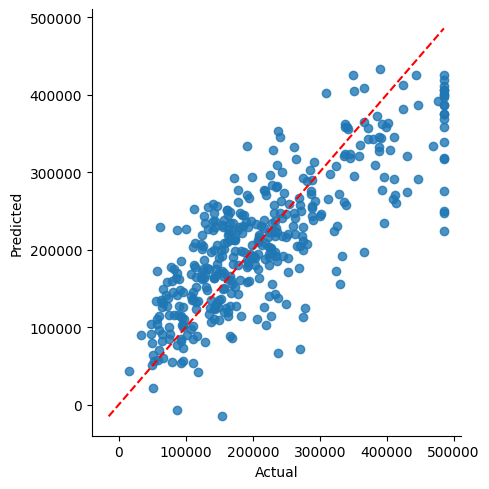

In [366]:
# Plot the actual vs predicted results
sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)

# Plot the diagonal line 
d_line= np.arange(df_results.min().min(), df_results.max().max())
plt.plot(d_line, d_line, color='red', linestyle='--')
plt.show()

In my dataset, i can see that there is not a perfect relashionship. On the lower values our predictions are biased 

### Normality

We will test normality by checking with the quantile-quantile plot, Q-Q plot.

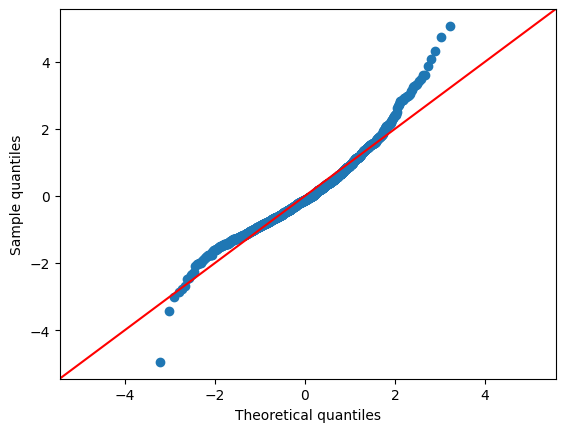

In [367]:
from statsmodels.graphics.gofplots import qqplot 

fig = qqplot(model.resid_pearson, line = '45', fit = 'True')
plt.xlabel("Theoretical quantiles")
plt.ylabel("Sample quantiles")
plt.show()

We can see that our model biasing

### Homoscedasticity

We will test homoscedasticity by plotting the residuals and checking if the variance is uniform.

/home/selmane/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


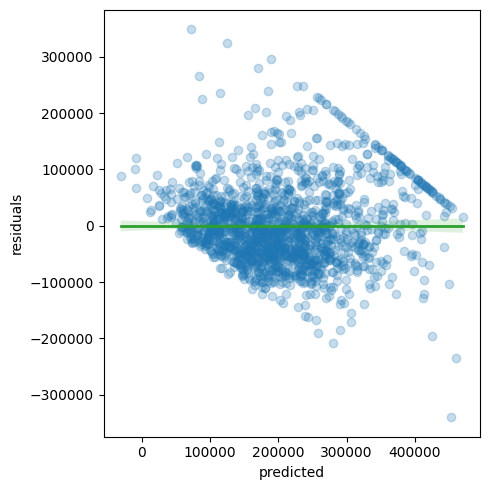

In [368]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.regplot(model.fittedvalues,model.resid, scatter_kws={'alpha': 0.25}, line_kws={'color': 'C2', 'lw': 2}, ax=ax)
ax.set_xlabel('predicted')
ax.set_ylabel('residuals')
plt.tight_layout()
plt.show()

We can say that the distribution of our residuals is not completely uniform.

### No Autocorrelation

We will perform the Durbin-Watson test to determine if the no autocorrelation assumption holds.

In [369]:
from statsmodels.stats.stattools import durbin_watson
durbinWatson = durbin_watson(model.resid)
print("Durbin-Watson:", durbinWatson)

Durbin-Watson: 1.9928225763129954


The Durbin-Watson statistic ranges between 0 and 4 : 
- A value of 2.0 means that there is no autocorrelation. 
- Values between 0 and 2 indicate positive 
- values between 2 and 4 indicate negative autocorrelation. 

In our case, Durbin-Watson statistic is very close to 2.0 therefore we can say that no autocorrelation assumption is not violated.

### No Multicolinearity

We will plot a heatmap to see the correlation between predictors visually and we will also calculate the variance inflation factor (VIF), which measures the multicollinearity among the independent variables.

In [370]:
mask = np.zeros_like(train_X.drop("const", axis=1).corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(train_X.drop("const", axis=1).corr().round(2), annot=True, mask=mask, cmap="cividis")

<AxesSubplot:>

And we calculate VIF:

In [371]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
for i in range(len(X.columns)):
    v=vif(np.matrix(X),i)
    print("Variance inflation factor for {}: {}".format(X.columns[i],round(v,2)))

Variance inflation factor for const: 0.0
Variance inflation factor for index: 1.19
Variance inflation factor for longitude: 20.81
Variance inflation factor for latitude: 22.59
Variance inflation factor for _<1H OCEAN: inf
Variance inflation factor for _INLAND: inf
Variance inflation factor for _ISLAND: nan
Variance inflation factor for _NEAR BAY: inf
Variance inflation factor for _NEAR OCEAN: inf
Variance inflation factor for housing_median_age: 1.2
Variance inflation factor for total_rooms: 13.11
Variance inflation factor for total_bedrooms: 39.72
Variance inflation factor for population: 5.86
Variance inflation factor for households: 37.73
Variance inflation factor for median_income: 1.88


/home/selmane/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/home/selmane/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/home/selmane/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Info : 
- A VIF of 1 indicates two variables are not correlated
- A VIF between 1 and 5 indicates a moderate correlation 
- And a VIF above 5 indicates a high correlation.

As result shows we have 5 high correlated and 2 moderately correlated variables. It is better if we get rid of some of them.

### BONUS: Outliers

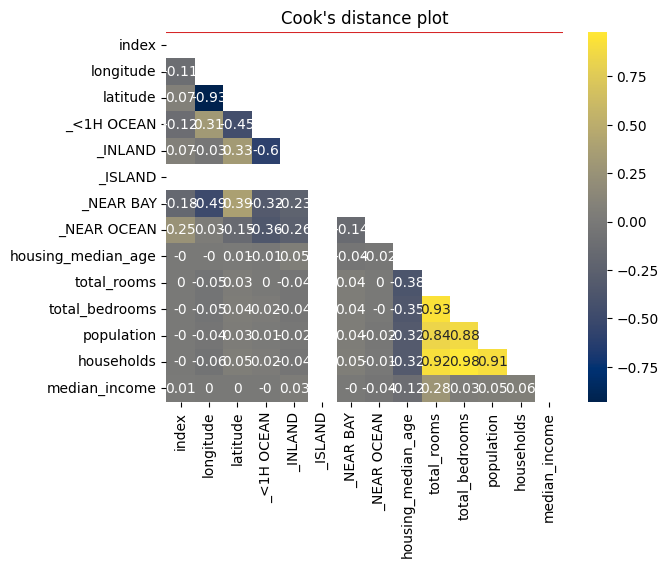

In [372]:
from statsmodels.stats.outliers_influence import OLSInfluence as influence

inf=influence(model)
(i, d) = inf.cooks_distance
plt.title("Cook's distance plot")
plt.stem(np.arange(len(i)), i, markerfmt=",")
plt.show()

From Cook’s plot, we can understand which are the observations we need to pay more attention to and decide whether to drop them or not. (As a rule, the observation has a high influence if the Cook’s distance is greater than 4/N-k-1 ( N=number of observations, k= number of predictors, yellow horizontal line in the plot)

### BONUS: Influence plot

Influence plots show the studentized residuals versus the leverage of each observation as measured by the hat matrix.

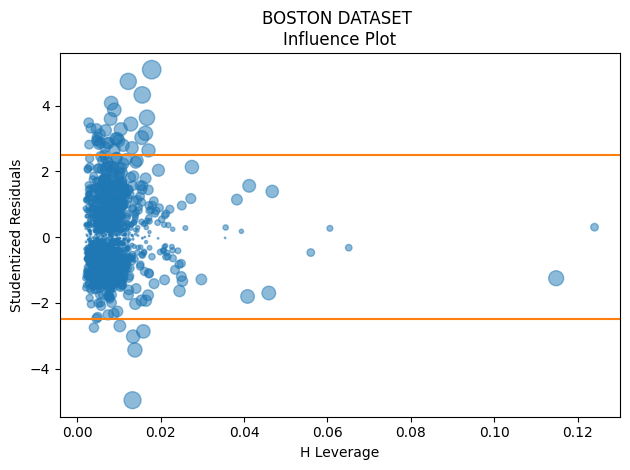

In [373]:
from statsmodels.stats.outliers_influence import OLSInfluence 
influence = OLSInfluence(model)
fig, ax = plt.subplots()
ax.axhline(-2.5, linestyle='-', color='C1')
ax.axhline(2.5, linestyle='-', color='C1')
ax.scatter(influence.hat_matrix_diag, influence.resid_studentized_internal, 
 s=1000 * np.sqrt(influence.cooks_distance[0]),
 alpha=0.5)
ax.set_xlabel('H Leverage')
ax.set_ylabel('Studentized Residuals')
ax.set_title("BOSTON DATASET \nInfluence Plot")
plt.tight_layout()
plt.show()

In the dataset we can see that some data points have low leverage but large or low residuals. These highly influential data points need a delicate evaluation before including in the model.